In [1]:
from matplotlib import pyplot as plt
from matplotlib import axes
from matplotlib import pyplot
import pandas as pd
import numpy as np
import math
from scipy import stats
import csv
import statistics

from collections import Counter
from collections import defaultdict

result_path = "./KEY/"
df=pd.read_excel(result_path + "final_meta_all_processed - dummy+days+cmntrt.xlsx")

ref = {"Creation":"CREAT",
       "Participation":"PART",
       "Connection_comment":"CXN-SP", 
       "Connection_game":"CXN-GAM"}

stats=["celebrity", "professional", "amateur"]
df.head()
df=df.fillna(0)
np.median(df.loc[df.status=="amateur"].rel_cmnt)

1.96078431372549

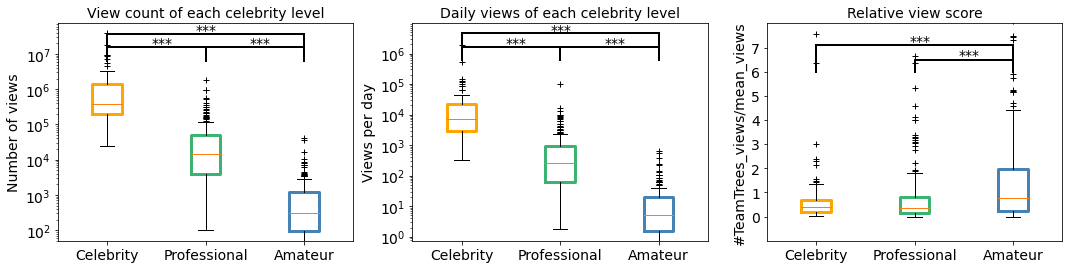

In [4]:
x_ticks = ["Celebrity", "Professional", "Amateur"]
colors = ["orange", "mediumseagreen", "steelblue"]
colors_ticks = ["orange", "green", "blue"]
star_size=14  

def draw_sigbar(x1,x2,y,h):
    plt.plot((x1,x2), (y+h,y+h), c="black", linewidth=2)
    plt.plot((x1,x1), (y,y+h), c="black", linewidth=2)
    plt.plot((x2,x2), (y,y+h), c="black", linewidth=2)
    
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

def sub_fig_multiy(field, yrange):
    t=0
    pos = [1, 2, 3]
    
    for st in stats: # for each group
        data=[]
        s=df.loc[(df.status==st)][field]
#         data.append([math.log10(d) if d!=0 else 0 for d in s])
        data=list(s)
        boxprops = dict(linestyle='-', linewidth=3, color=colors[t], label = x_ticks[t])
        plot_var=plt.boxplot(data, sym='+', positions=[pos[t]], vert=1,
                                     whis=1.5,widths=0.3, boxprops=boxprops)
        plt.ylabel(st, fontsize=14)
#         plt.ylim(yrange)
        t+=1 
    plt.yticks(fontsize=star_size)
    plt.xticks([1,2,3], x_ticks, fontsize=star_size)
#     plt.xlim(0.7,3.5)
#     host.legend([bp["boxes"][0] for bp in bps], stats, loc='upper left',mode="expand",ncol=3)


plt.figure(figsize=(18,4))
host= plt.subplot(1,3,1)
host.set_yscale('log')
sub_fig_multiy("vw_ct", (0,10))
plt.title("View count of each celebrity level", fontsize=star_size)
plt.ylabel("Number of views", fontsize=14)
draw_sigbar(1,2,pow(10,6.8),pow(10,7))
host.annotate("***", xy=(1.45,pow(10,7.2)), zorder=10, fontsize=star_size)
draw_sigbar(2,3,pow(10,6.8),pow(10,7))
host.annotate("***", xy=(2.45,pow(10,7.2)), zorder=10, fontsize=star_size)
draw_sigbar(1,3,pow(10,6.8),pow(10,7.5))
host.annotate("***", xy=(1.9,pow(10,7.55)), zorder=10, fontsize=star_size)

host=plt.subplot(1,3,2)
host.set_yscale('log')
sub_fig_multiy("day_vw", (-3,9))
plt.title("Daily views of each celebrity level", fontsize=star_size)
plt.ylabel("Views per day", fontsize=14)
host.annotate("***", xy=(2.45,pow(10,6.2)), zorder=10, fontsize=star_size)
draw_sigbar(2,3,pow(10,5.8),pow(10,6))
host.annotate("***", xy=(1.45,pow(10,6.2)), zorder=10, fontsize=star_size)
draw_sigbar(1,2,pow(10,5.8),pow(10,6))
host.annotate("***", xy=(1.9,pow(10,6.65)), zorder=10, fontsize=star_size)
draw_sigbar(1,3,pow(10,5.8),pow(10,6.6))


ax=plt.subplot(1,3,3)
sub_fig("rel_vw", (-1,8))
plt.title("Relative view score", fontsize=star_size)
plt.ylabel("#TeamTrees_views/mean_views", fontsize=star_size)
ax.annotate("***", xy=(1.95,7.1), zorder=10, fontsize=star_size)
draw_sigbar(1,3,6,1.1)
ax.annotate("***", xy=(2.45,6.5), zorder=10, fontsize=star_size)
draw_sigbar(2,3,6,0.5)
plt.yticks(range(0,8,1),fontsize=star_size)


plt.savefig(result_path + "popularity_by_groups.eps", bbox_inches = 'tight')

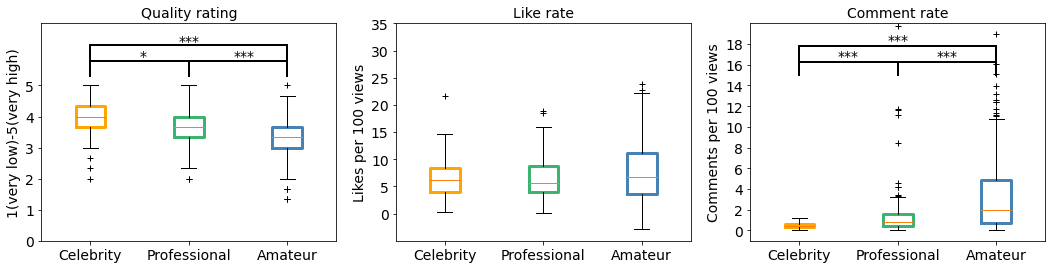

In [3]:
def sub_fig(field, y_range):
    t=0
    bps=[]
    pos = [1,2,3]
    for st in stats: # for each group
        data=[]
        s=df.loc[(df.status==st)][field]
        data.append(s)
        boxprops = dict(linestyle='-', linewidth=3, color=colors[t])
        bp=plt.boxplot(data, sym='+', positions=[pos[t]], vert=1, whis=1.5,widths=0.3, boxprops=boxprops)
        bps.append(bp)
        plt.ylim(y_range)
        t+=1  
    plt.xticks(pos, x_ticks, fontsize=star_size)
#     ax.legend([bp["boxes"][0] for bp in bps], stats, loc='upper left',mode="expand",ncol=3)

def draw_sigbar(x1,x2,y,h):
    plt.plot((x1,x2), (y+h,y+h), c="black", linewidth=2)
    plt.plot((x1,x1), (y,y+h), c="black", linewidth=2)
    plt.plot((x2,x2), (y,y+h), c="black", linewidth=2)

props = {'connectionstyle':'bar','arrowstyle':'-','shrinkA':0,'shrinkB':2,'linewidth':2}

plt.figure(figsize=(18,4))
ax=plt.subplot(1,3,1)
sub_fig("quality", (0,7))
plt.title("Quality rating", fontsize=star_size)
plt.ylabel("1(very low)-5(very high)", fontsize=star_size)
plt.yticks(range(6), fontsize=star_size)
ax.annotate("***", xy=(1.9,6.3), zorder=10, fontsize=star_size)
draw_sigbar(1,3,5.3,1)
ax.annotate("***", xy=(2.45,5.8), zorder=10, fontsize=star_size)
draw_sigbar(2,3,5.3,0.5)
ax.annotate("*", xy=(1.5,5.8), zorder=10, fontsize=star_size)
draw_sigbar(1,2,5.3,0.5)

ax=plt.subplot(1,3,2)
sub_fig("rel_like", (0,40))
plt.title("Like rate", fontsize=star_size)
plt.ylabel("Likes per 100 views", fontsize=star_size)
plt.yticks(range(0,41,5),fontsize=star_size)
plt.ylim(-5,35)

ax=plt.subplot(1,3,3)
sub_fig("rel_cmnt", (-1,20))
plt.title("Comment rate", fontsize=star_size)
plt.ylabel("Comments per 100 views", fontsize=star_size)
ax.annotate("***", xy=(2,18), zorder=10, fontsize=star_size, ha="center")
draw_sigbar(1,3,15,2.8)
ax.annotate("***", xy=(2.5,16.4), zorder=10, fontsize=star_size, ha="center")
draw_sigbar(2,3,15,1.25)
ax.annotate("***", xy=(1.5,16.4), zorder=10, fontsize=star_size, ha="center")
draw_sigbar(1,2,15,1.25)
plt.yticks(range(0,20,2),fontsize=star_size)
plt.savefig(result_path + "quality_by_groups.eps", bbox_inches = 'tight')